tidal
-----

This notebook produces figure 15 of the review Krumholz, McKee, & Bland-Hawthorn (2019, ARA&A, submitted).

In [1]:
%matplotlib inline

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import os.path as osp

In [3]:
# Tidal potential, where x, y, and z are measured in units
# of the tidal radius, for the restricted case of zero
# effective eigenvalue in the y direction
def phi(x, y, z, lz):
    return -1/np.sqrt(x**2 + y**2 + z**2) - \
        (x**2 + lz*z**2)/2.0

In [4]:
# Equations of isopotential surfaces. This is a bit horrible, 
# because the equation of the isosurface z(x,y) is a cubic in z^2,
# which has 3 generally complex roots, some of which can be
# fictitious because the cubic is created by squaring the
# original equation. We want the minimum positive, real,
# non-fictitious root for z2. The formulae for the 3 roots
# come from mathematica.
def ziso(x, y, lz, ej=1.0):
    
    # Convenience definitions
    x2 = x**2 + 0j
    y2 = y**2 + 0j
    
    # 3 roots as found by mathematica -- thank god for exporting
    # in fortran form
    z2_1 = np.atleast_1d(
        (-(lz*(-6*ej + (2 + lz)*x2 + lz*y2)) + 
         (lz**2*(3*ej + (-1 + lz)*x2 + lz*y2)**2)/
          (-27*ej**3*lz**3 + lz**3*x2**3 + 3*lz**5*x2*(x2 + y2)**2 - 
             lz**6*(x2 + y2)**3 - 27*ej**2*lz**3*((-1 + lz)*x2 + lz*y2) - 
             9*ej*lz**3*((-1 + lz)*x2 + lz*y2)**2 - 3*lz**4*(-18 + x2**3 + x2**2*y2) + 
             6*np.sqrt(3)*np.sqrt(-(lz**7*
                  (27*ej**3 - x2**3 - 3*lz**2*x2*(x2 + y2)**2 + lz**3*(x2 + y2)**3 + 
                    27*ej**2*((-1 + lz)*x2 + lz*y2) + 9*ej*((-1 + lz)*x2 + lz*y2)**2 + 
                    3*lz*(-9 + x2**3 + x2**2*y2)))))**0.3333333333333333 + 
         (-27*ej**3*lz**3 + lz**3*x2**3 + 3*lz**5*x2*(x2 + y2)**2 - 
            lz**6*(x2 + y2)**3 - 27*ej**2*lz**3*((-1 + lz)*x2 + lz*y2) - 
            9*ej*lz**3*((-1 + lz)*x2 + lz*y2)**2 - 3*lz**4*(-18 + x2**3 + x2**2*y2) + 
            6*np.sqrt(3)*np.sqrt(-(lz**7*
                 (27*ej**3 - x2**3 - 3*lz**2*x2*(x2 + y2)**2 + lz**3*(x2 + y2)**3 + 
                   27*ej**2*((-1 + lz)*x2 + lz*y2) + 9*ej*((-1 + lz)*x2 + lz*y2)**2 + 
                   3*lz*(-9 + x2**3 + x2**2*y2)))))**0.3333333333333333)/(3.*lz**2)
    )
    z2_2 = np.atleast_1d(
        (-4*lz*(-6*ej + (2 + lz)*x2 + lz*y2) - 
         (2j*(-1j + np.sqrt(3))*lz**2*(3*ej + (-1 + lz)*x2 + lz*y2)**2)/
          (-27*ej**3*lz**3 + lz**3*x2**3 + 3*lz**5*x2*(x2 + y2)**2 - 
             lz**6*(x2 + y2)**3 - 27*ej**2*lz**3*((-1 + lz)*x2 + lz*y2) - 
             9*ej*lz**3*((-1 + lz)*x2 + lz*y2)**2 - 3*lz**4*(-18 + x2**3 + x2**2*y2) + 
             6*np.sqrt(3)*np.sqrt(-(lz**7*
                  (27*ej**3 - x2**3 - 3*lz**2*x2*(x2 + y2)**2 + lz**3*(x2 + y2)**3 + 
                    27*ej**2*((-1 + lz)*x2 + lz*y2) + 9*ej*((-1 + lz)*x2 + lz*y2)**2 + 
                    3*lz*(-9 + x2**3 + x2**2*y2)))))**0.3333333333333333 + 
         2j*(1j + np.sqrt(3))*(-27*ej**3*lz**3 + lz**3*x2**3 + 
             3*lz**5*x2*(x2 + y2)**2 - lz**6*(x2 + y2)**3 - 
             27*ej**2*lz**3*((-1 + lz)*x2 + lz*y2) - 
             9*ej*lz**3*((-1 + lz)*x2 + lz*y2)**2 - 3*lz**4*(-18 + x2**3 + x2**2*y2) + 
             6*np.sqrt(3)*np.sqrt(-(lz**7*
                  (27*ej**3 - x2**3 - 3*lz**2*x2*(x2 + y2)**2 + lz**3*(x2 + y2)**3 + 
                    27*ej**2*((-1 + lz)*x2 + lz*y2) + 9*ej*((-1 + lz)*x2 + lz*y2)**2 + 
                    3*lz*(-9 + x2**3 + x2**2*y2)))))**0.3333333333333333)/(12.*lz**2)    
    )
    z2_3 = np.atleast_1d(
        (-4*lz*(-6*ej + (2 + lz)*x2 + lz*y2) + 
         (2j*(1j + np.sqrt(3))*lz**2*(3*ej + (-1 + lz)*x2 + lz*y2)**2)/
          (-27*ej**3*lz**3 + lz**3*x2**3 + 3*lz**5*x2*(x2 + y2)**2 - 
             lz**6*(x2 + y2)**3 - 27*ej**2*lz**3*((-1 + lz)*x2 + lz*y2) - 
             9*ej*lz**3*((-1 + lz)*x2 + lz*y2)**2 - 3*lz**4*(-18 + x2**3 + x2**2*y2) + 
             6*np.sqrt(3)*np.sqrt(-(lz**7*
                  (27*ej**3 - x2**3 - 3*lz**2*x2*(x2 + y2)**2 + lz**3*(x2 + y2)**3 + 
                    27*ej**2*((-1 + lz)*x2 + lz*y2) + 9*ej*((-1 + lz)*x2 + lz*y2)**2 + 
                    3*lz*(-9 + x2**3 + x2**2*y2)))))**0.3333333333333333 - 
         2*(1 + 1j*np.sqrt(3))*(-27*ej**3*lz**3 + lz**3*x2**3 + 
             3*lz**5*x2*(x2 + y2)**2 - lz**6*(x2 + y2)**3 - 
             27*ej**2*lz**3*((-1 + lz)*x2 + lz*y2) - 
             9*ej*lz**3*((-1 + lz)*x2 + lz*y2)**2 - 3*lz**4*(-18 + x2**3 + x2**2*y2) + 
             6*np.sqrt(3)*np.sqrt(-(lz**7*
                  (27*ej**3 - x2**3 - 3*lz**2*x2*(x2 + y2)**2 + lz**3*(x2 + y2)**3 + 
                    27*ej**2*((-1 + lz)*x2 + lz*y2) + 9*ej*((-1 + lz)*x2 + lz*y2)**2 + 
                    3*lz*(-9 + x2**3 + x2**2*y2)))))**0.3333333333333333)/(12.*lz**2)    
    )
    
    # Back-substitute roots into original equation to make sure they're
    # not fictitious; if they are fictitious, set them to a flag value
    res = -1/np.sqrt(x2 + y2 + z2_1) - 0.5*(x2 + lz*z2_1) + 1.5*ej
    z2_1[np.logical_not(np.isclose(res,0))] = np.inf
    res = -1/np.sqrt(x2 + y2 + z2_2) - 0.5*(x2 + lz*z2_2) + 1.5*ej
    z2_2[np.logical_not(np.isclose(res,0))] = np.inf
    res = -1/np.sqrt(x2 + y2 + z2_3) - 0.5*(x2 + lz*z2_3) + 1.5*ej
    z2_3[np.logical_not(np.isclose(res,0))] = np.inf
    
    # Set negative or imaginary solutions for z2 to a flag value
    z2_1r = np.real(z2_1)
    z2_1r[np.logical_not(np.isclose(np.imag(z2_1),0))] = np.inf
    z2_1r[z2_1r < 0] = np.inf
    z2_2r = np.real(z2_2)
    z2_2r[np.logical_not(np.isclose(np.imag(z2_2),0))] = np.inf
    z2_2r[z2_2r < 0] = np.inf
    z2_3r = np.real(z2_3)
    z2_3r[np.logical_not(np.isclose(np.imag(z2_3),0))] = np.inf
    z2_3r[z2_3r < 0] = np.inf
        
    # Take minimum real root
    z2 = np.minimum.reduce((z2_1r,z2_2r,z2_3r))
    z = np.zeros(z2.shape)
    z[z2 != np.inf] = np.sqrt(z2[z2 != np.inf])
    z[z2 == np.inf] = np.nan
    return z

In [5]:
# Equation of the Jacobi surface. This is just the isopotential
# surface with E = E_Jacobi.
def zj(x, y, lz):
    return ziso(x, y, lz, 1.0)

In [6]:
# Equation for the location of the Jacobi surface in the z = 0 plane;
# the root returned is the y > 0 one
def yj(x):
    return (1-x**2) * np.sqrt(4-x**2) / (3-x**2)

In [7]:
# Create a grid to draw the central ellipsoid
ng = 100
x = np.linspace(-1,1,ng)
y = np.linspace(-1,1,ng)
xx, yy = np.meshgrid(x, y, indexing='ij')
for i in range(ng):
    yy[i,:] = yy[i,:] * yj(x[i])
zz = zj(xx, yy, -1./3.)
zz[np.logical_not(np.isfinite(zz))] = 0.0   # Fix NaN's due to finite precision

In [8]:
# Grid to draw the part of the Jacobi surface at x > 1
x1 = np.linspace(1,1.5,ng)
y1 = np.linspace(-1,1,ng)
xx1, yy1 = np.meshgrid(x1, y1, indexing='ij')
for i in range(ng):
    yy1[i,:] = yy1[i,:] * yj(x1[i])
zz1 = zj(xx1,yy1,-1./3.)
zz1[np.logical_not(np.isfinite(zz1))] = 0.0

# Grid to draw the part of the Jacobi surface at x < -1
x2 = np.linspace(-1.5,-1,ng)
y2 = np.linspace(-1,1,ng)
xx2, yy2 = np.meshgrid(x2, y2, indexing='ij')
for i in range(ng):
    yy2[i,:] = yy2[i,:] * yj(x2[i])
zz2 = zj(xx2,yy2,-1./3.)
zz2[np.logical_not(np.isfinite(zz2))] = 0.0

In [9]:
# Grid to draw a sphere at r = r_tidal
xs = np.linspace(-1,1,ng)
ys = np.linspace(-1,1,ng)
xxs, yys = np.meshgrid(xs, ys, indexing='ij')
for i in range(ng):
    yys[i,:] = yys[i,:] * np.sqrt(1.0-xs[i]**2)
zzs = np.sqrt(1 - xxs**2 - yys**2)
zzs[np.logical_not(np.isfinite(zzs))] = 0.0

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [10]:
# Grid to draw isosurface at potential 5% above E_J
xe = np.linspace(-1.5,1.5,ng)
ye = np.linspace(-1.5,1.5,ng)
xxe, yye = np.meshgrid(xe, ye, indexing='ij')
zze = ziso(xxe, yye, -1./3., 0.95)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


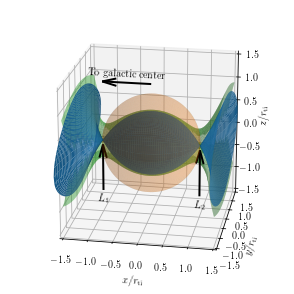

In [11]:
# Make plot
fig = plt.figure(1, figsize=(4,4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# 3D plot of Jacobi surface
alpha = 1
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=alpha, color='C0')
ax.plot_surface(xx.T, yy.T, -zz.T, alpha=alpha, color='C0')
ax.plot_surface(xx1, yy1, zz1, alpha=alpha, color='C0')
ax.plot_surface(xx1.T, yy1.T, -zz1.T, alpha=alpha, color='C0')
ax.plot_surface(xx2, yy2, zz2, alpha=alpha, color='C0')
ax.plot_surface(xx2.T, yy2.T, -zz2.T, alpha=alpha, color='C0')

# Draw sphere at r = r_tidal
alpha = 0.2
ax.plot_surface(xxs, yys, zzs, alpha=alpha, color='C1')
ax.plot_surface(xxs.T, yys.T, -zzs.T, alpha=alpha, color='C1')

# Draw 5% greater than Jacobi isosurface
alpha = 0.5
ax.plot_surface(xxe, yye, zze, alpha=alpha, color='C2')
ax.plot_surface(xxe.T, yye.T, -zze.T, alpha=alpha, color='C2')

# Add arrow to galactic center
ax.quiver([0], [0], [1.25], [-1], [0], [0], color='k', lw=2)
ax.text(-0.5, 0, 1.3, 'To galactic center', zdir='x',
        horizontalalignment='center', verticalalignment='bottom')

# Add labels for Lagrange points
ax.quiver([-1], [0], [-1.1], [0], [0], [1], color='k', lw=2)
ax.text(-1, 0, -1.2, r'$L_1$', zdir='x',
        horizontalalignment='center', verticalalignment='top')
ax.quiver([1], [0], [-1.1], [0], [0], [1], color='k', lw=2)
ax.text(1, 0, -1.2, r'$L_2$', zdir='x',
        horizontalalignment='center', verticalalignment='top')

# Set limits and label axes
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_zlim([-1.5,1.5])
ax.set_xlabel(r'$x/r_{\mathrm{ti}}$')
ax.set_ylabel(r'$y/r_{\mathrm{ti}}$')
ax.set_zlabel(r'$z/r_{\mathrm{ti}}$')

# Adjust viewing angle
ax.view_init(azim=-80, elev=20)

# Fix overlarge margins
plt.subplots_adjust(top=1, left=0, right=1, bottom=0.05)

# Fix aspect ratio
ax.set_aspect('equal')

# Save
plt.savefig(osp.join('figures', 'tidal_3d.pdf'))

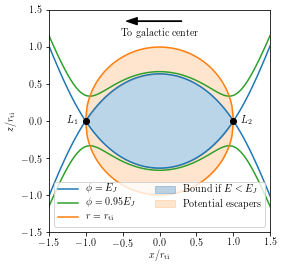

In [12]:
# Make xz plane view
fig = plt.figure(1, figsize=(4,4))

# Plot Jacobi surface
x = np.linspace(-1.5,1.5,ng)
handles=[]
p,=plt.plot(x, zj(x,0.0,-1./3.), color='C0',
            label=r'$\phi = E_J$')
plt.plot(x, -zj(x,0.0,-1./3.), color='C0')
handles.append(p)

# Shade bound region
x = np.linspace(-1,1,ng)
plt.fill_between(x, -zj(x,0.0,-1./3.), zj(x,0.0,-1./3.),
                 color='C0', alpha=0.3)

# Plot isopotential surface at energy 5% greater
# than Jacobi energy
x = np.linspace(-1.5,1.5,ng)
p,=plt.plot(x, ziso(x,0.0,-1./3.,0.95), color='C2',
            label=r'$\phi = 0.95 E_J$')
plt.plot(x, -ziso(x,0.0,-1./3.,0.95), color='C2')
handles.append(p)

# Plot tidal radius
x = np.linspace(-1,1,ng)
p,=plt.plot(x, np.sqrt(1-x**2), color='C1', alpha=1,
            label=r'$r=r_{\mathrm{ti}}$')
plt.plot(x, -np.sqrt(1-x**2), color='C1', alpha=1)
plt.fill_between(x, -np.sqrt(1-x**2), -zj(x,0.0,-1./3.),
                 color='C1', alpha=0.2)
plt.fill_between(x, zj(x,0.0,-1./3.), np.sqrt(1-x**2),
                 color='C1', alpha=0.2)
handles.append(p)

# Label Lagrange points
plt.plot([-1], [0], 'ko')
plt.plot([1], [0], 'ko')
plt.text(-1.1, 0, r'$L_1$', color='k',
         horizontalalignment='right',
         verticalalignment='center')
plt.text(1.1, 0, r'$L_2$', color='k',
         horizontalalignment='left',
         verticalalignment='center')

# Add galactic center arrow
plt.arrow(0.3, 1.35, -0.6, 0, width=0.01, head_width=0.1, fc='k')
plt.text(0, 1.25, 'To galactic center',
         horizontalalignment='center', verticalalignment='top')
         
# Add legend
blue_patch = mpatches.Patch(color='C0', alpha=0.3, 
                            label=r'Bound if $E<E_J$')
orange_patch = mpatches.Patch(color='C1', alpha=0.2, 
                              label=r'Potential escapers')
handles.append(blue_patch)
handles.append(orange_patch)
plt.legend(handles=handles, loc='lower center', ncol=2)

# Set limits and axis labels
plt.gca().set_aspect('equal')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel(r'$x/r_{\mathrm{ti}}$')
plt.ylabel(r'$z/r_{\mathrm{ti}}$')

# Adjust margins
plt.subplots_adjust(left=0.18, right=0.95, top=0.95)

# Save
plt.savefig(osp.join('figures', 'tidal_xz.pdf'))